# Process five-echo flashing checkerboard dataset for software demo

In [1]:
%matplotlib inline
import os
import os.path as op
from glob import glob

from tedana.workflows import tedana_workflow

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Download data

In [2]:
%%time
dset_dir = 'five-echo-dataset/'
wd = os.getcwd()

if not op.isdir(dset_dir):
    os.mkdir(dset_dir)

!curl -L -o five_echo_NIH.tar.xz https://osf.io/ea5v3/download
!tar xf five_echo_NIH.tar.xz -C five-echo-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1570      0 --:--:-- --:--:-- --:--:--  1633
100 68.5M  100 68.5M    0     0  2744k      0  0:00:25  0:00:25 --:--:-- 1426k      0  0:00:37  0:00:07  0:00:30 2469k0:24  0:00:23  0:00:01 2374k
CPU times: user 545 ms, sys: 153 ms, total: 697 ms
Wall time: 26.3 s


## Run workflow

INFO:tedana.workflows.tedana:Using output directory: /Users/tsalo/Documents/tsalo/tedana-ohbm2019/five-echo-dataset
INFO:tedana.workflows.tedana:Loading input data: ['five-echo-dataset/p06.SBJ01_S09_Task11_e1.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e2.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e3.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e4.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e5.sm.nii.gz']
INFO:tedana.workflows.tedana:Computing EPI mask from first echo
INFO:tedana.workflows.tedana:Computing T2* map
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
INFO:tedana.comb

CPU times: user 5min 24s, sys: 26 s, total: 5min 50s
Wall time: 4min 21s


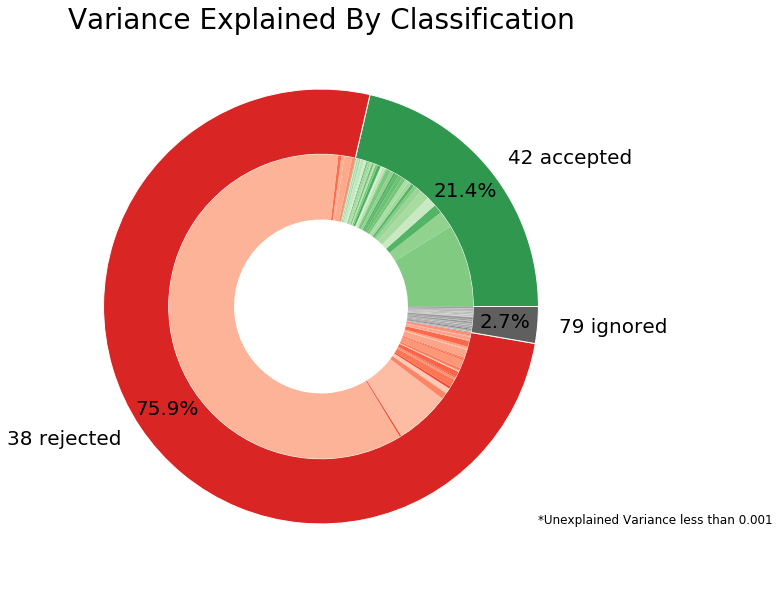

In [3]:
%%time
files = sorted(glob(op.join(dset_dir, '*.nii.gz')))
tes = [15.4, 29.7, 44.0, 58.3, 72.6]
tedana_workflow(files, tes, out_dir=dset_dir, png=True, fixed_seed=8)

In [4]:
os.chdir(wd)
os.remove('five_echo_NIH.tar.xz')